# 大宗商品投资研究

- 作者：DGC'Idea
- 版本：V0.1   
- 更新日期：2018年2月5日

----------

- 跟踪标的：comex黄金、comex白银、伦敦金、伦敦银、NYMEX原油、布伦特原油；
- 数据源：新浪财经；
- 分析结果：估值表、估值图表、金银比、金油比。

In [1]:
#到入库
import pandas as pd
import numpy as np
import datetime
import matplotlib as plt  

import os

#引入自定义库
import sys
sys.path.append('/home/jquser')
from pf_cmm import Cmm

cmm=Cmm('csv','../Data/')

数据引擎：运行于研究
商品框架：运行于研究


## 1.获取数据

In [2]:
#更新商品数据
cmm.data.update(cmm.pool.track)
cmm.value.update(cmm.pool.track,[10],True)
cmm.change.update(cmm.pool.track,['close'],True)

数据更新：商品，无需更新 
数据分析：伦敦金，[ 10年 ] 数据数据 

/home/jquser/tl.py:84: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['pre']=df.iloc[:,0].shift(1)


数据分析：商品估值，分析完毕 ] 数据 
数据分析：商品行情，分析完毕格 ] 数据 据  


## 2.价格分析

- 百分位：为时间窗内小于当前值的样本个数与总体样本个数的比率，代表当前值在历史统计值的估值位置；
- 区　间：按百分位分为七个区间：极高(>90%)，较高(80%~90%)，偏高(60%~80%)，正常(40%~60%)，偏低(20%~40%)，较低(10%~20%)，极低(<10%)；
- 最小值：是统计时间窗内指数的理论最小值，表示其值下限；
- 最大值：是统计时间窗内指数的理论最大值，表示其值上限；

In [3]:
df=cmm.value.table.show()
df

,名称,收盘价格,高度(%),区间,最低值,最高值,中位值,距底(%),机会值,危险值
XAG,伦敦银,15.07,12.01,较低,11.88,48.43,17.88,-21.17,15.83,28.63
OIL,布伦特原油,69.16,39.88,偏低,27.73,126.65,76.63,-59.90,53.88,109.13
XAU,伦敦金,1303.95,58.73,合理,868.80,1899.90,1277.03,-33.37,1183.79,1482.13


## 2.涨跌分析

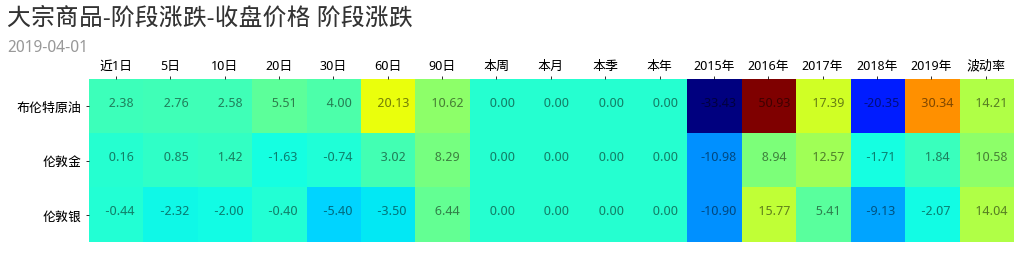

In [4]:
fig=cmm.change.chart.heat(cmm.pool.track,item='close',cols=[],title='大宗商品-阶段涨跌')


## 3.金银比

金银价格长期看有极强的正相关。
- 金价上涨，银价大概率涨更多；金价持平，银价大概率上涨。
- 金价小跌，银价大概率持平或小涨；金价大跌，银价大概率持平或小跌。

金银比是指一盎司的黄金与一盎司的白银价格之间的比率。
- 高于70：银价低估，优先建仓白银；高于80：银价严重低估，加速建仓白银。
- 低于55：金价低估，优先建仓黄金；低于45，金价严重低估，加速建仓黄金。
- 55-70之间：金银比属合理区间，根据金银价格决定是否投资。
 
整体而言，会呈现出以下规律，即经济处于衰退周期，白银的下跌比黄金来得迅速，反之，经济处于上升周期，白银的上升也会比黄金来得快。比值越高代表着经济越不稳定。

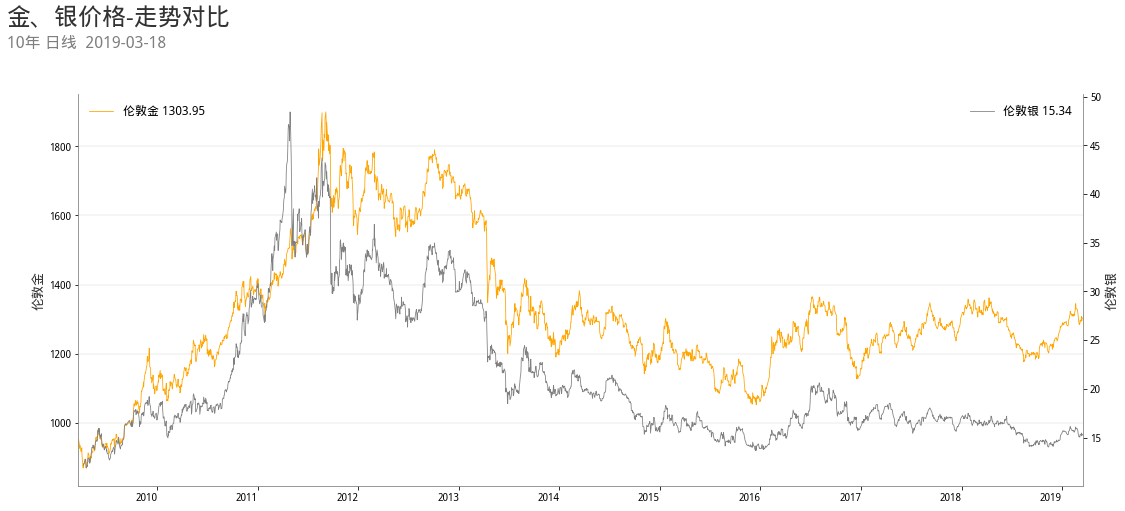

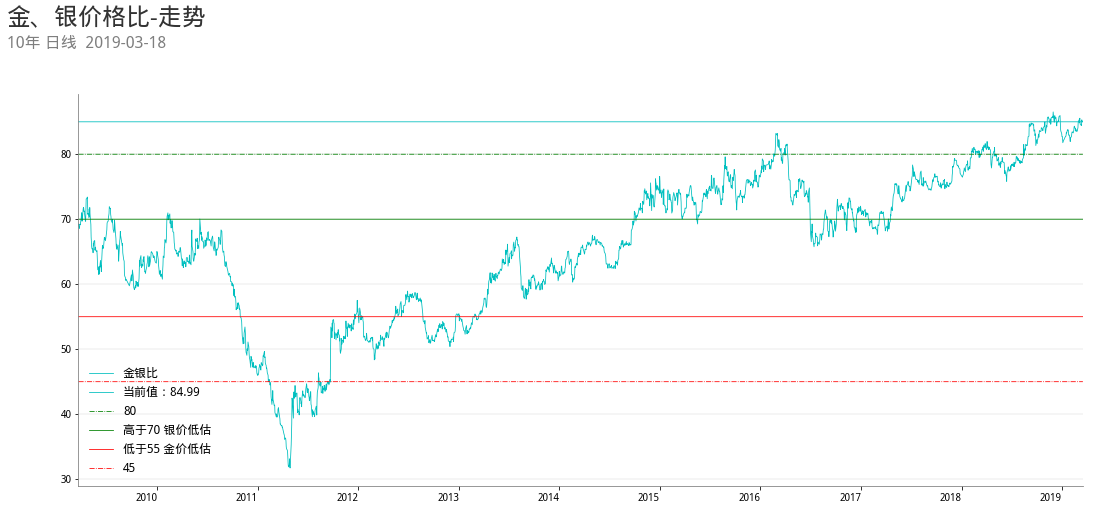

In [5]:
cmm.value.chart.compar(['XAU','XAG'],title='金、银价格')
cmm.value.chart.gsr()

## 4.金油比

金油比是指黄金价格与原油价格的比值。
- 比例越低，意味着金价上涨或油价下跌可能性越高；
- 比例越高，则表示金价下跌或者油价上涨的可能性越高。
 
金油比可以视作风险结构变化的前瞻指标，反应了市场对经济风险和地缘政治风险的敏感性差异，每一次金油比高于30之后，都发生了经济风险向地缘政治风险重心转移的大事件。

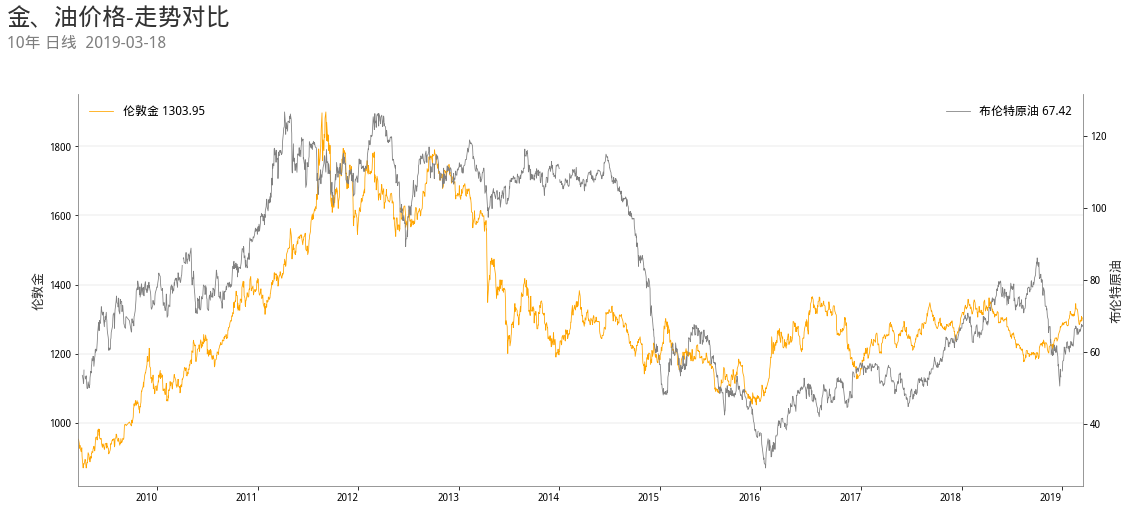

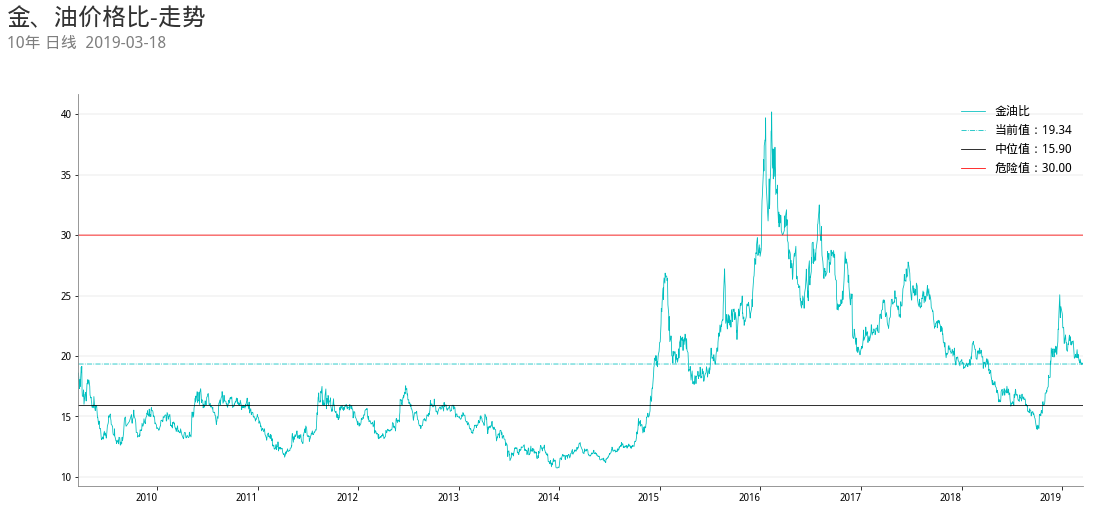

In [6]:
cmm.value.chart.compar(['XAU','OIL'],title='金、油价格')
cmm.value.chart.gor()

## 5.价格走势图

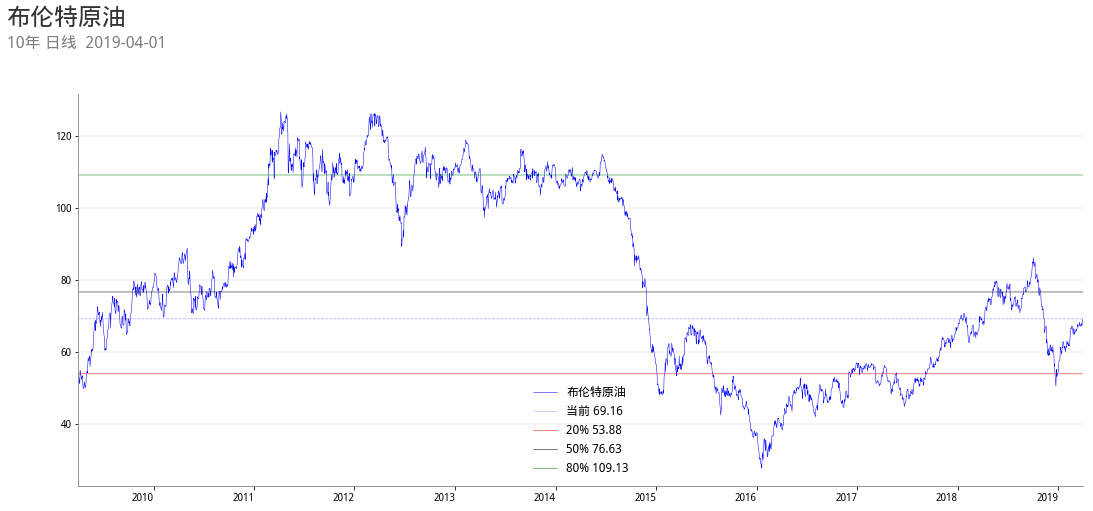

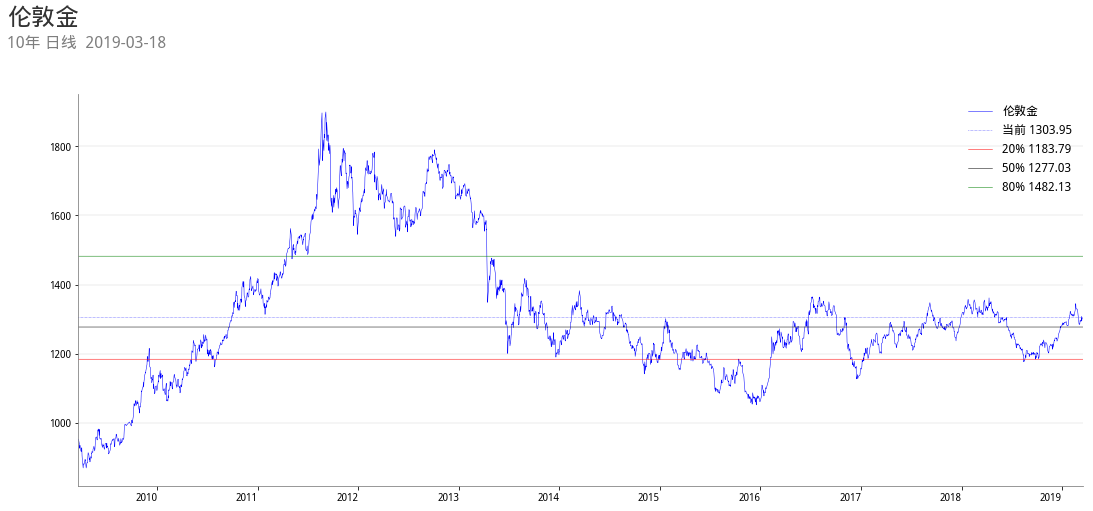

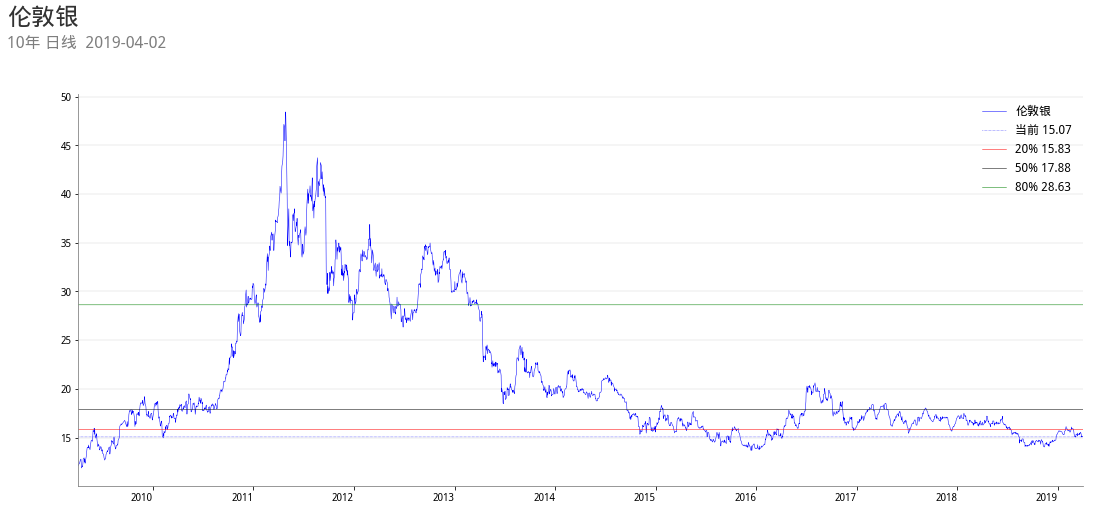

In [7]:
cmm.value.chart.line(cmm.pool.track)

## 6.生成标的

In [4]:
pool={
    'XAU':u'伦敦金',
    'XAG':u'伦敦银',
    'OIL':u'布伦特原油'
    }

cmm.pool.create(pool)
cmm.pool.track

{'OIL': u'\u5e03\u4f26\u7279\u539f\u6cb9',
 'XAG': u'\u4f26\u6566\u94f6',
 'XAU': u'\u4f26\u6566\u91d1'}